# Implementación II - Redes neuronales.

## Lectura y visualización de los datos.

Leo el dataset e imprimo 10 muestras aleatorias.

In [1]:
import pandas as pd

df = pd.read_csv("data/star_class_clean.csv")
df.sample(10)

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
27287,179.283964,40.069323,21.59532,21.13588,20.84076,20.67496,20.68561,346,9.954256e+18,0.399610,8841,57425,637,GALAXY
85111,202.422535,56.219954,22.94467,20.95155,19.22754,18.56725,18.13382,59,7.687906e+18,0.376982,6828,56430,952,GALAXY
98521,119.665239,32.557186,23.57464,20.10562,19.17076,18.87337,18.67379,85,4.229027e+18,0.000042,3756,55505,536,STAR
30123,202.207342,46.262392,15.76661,14.41654,13.90791,13.65757,13.44083,100,1.647246e+18,0.008740,1463,53063,197,GALAXY
91381,189.817217,14.386027,22.41492,20.12169,18.33464,17.68521,17.29232,126,6.085721e+18,0.364951,5405,56010,842,GALAXY
57739,351.001841,33.127509,22.23210,21.97691,21.04938,20.45526,19.97167,68,8.733694e+18,0.258532,7757,58392,321,GALAXY
62679,8.461009,9.554616,25.31595,22.47465,20.69067,19.65564,19.18034,98,5.111808e+18,0.521064,4540,55863,807,GALAXY
24668,124.694005,4.229360,24.42871,21.27547,19.43663,18.66156,18.11464,41,5.361665e+18,0.455279,4762,55888,472,GALAXY
92098,177.590366,25.529352,22.26299,21.84093,21.91844,21.90352,21.63445,57,7.224046e+18,-0.000157,6416,56312,990,STAR
41722,6.625592,7.827676,23.25820,23.44628,22.19833,20.98371,19.79165,40,1.273749e+19,0.675559,11313,58426,679,GALAXY


Obtengo las variables de entrada (X) y de salida (y).  
Posteriormente instancio un objeto de la clase LabelEncoder() y transformo las etiquetas (clases) a números.  
Por último, estandarizo las características de los datos: 

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x_vars = df.columns[:-1]
X = df[x_vars].values
y_labels = df['class'].values                 

le = preprocessing.LabelEncoder()
y = le.fit_transform(y_labels) 

scaler = StandardScaler()
X = scaler.fit_transform(X)

df.sample(10)

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
54371,156.811346,21.355818,23.05093,22.35921,22.14085,21.44407,20.73619,38,1.082329e+19,0.886891,9613,57865,56,GALAXY
96476,331.899547,0.948019,18.12528,17.09736,16.98921,16.97357,17.02393,142,3.542174e+18,-0.000408,3146,54773,337,STAR
22603,122.613632,56.968556,25.42697,23.14183,21.24778,19.95769,19.52757,147,5.797427e+18,0.625651,5149,55944,613,GALAXY
28727,235.273119,1.887105,23.75702,22.03280,21.08986,20.08664,19.73501,737,4.564407e+18,1.154858,4054,55358,31,QSO
88596,215.108064,15.982643,20.49798,18.42043,17.26720,16.78959,16.42930,37,3.091856e+18,0.166791,2746,54232,490,GALAXY
16610,220.324771,-0.614905,22.47285,22.15175,20.54201,19.62029,19.08825,698,4.533100e+18,0.540485,4026,55325,824,GALAXY
98675,134.707047,23.344393,21.73393,21.67888,20.56421,19.55903,19.24703,163,5.829914e+18,0.653318,5178,56246,17,GALAXY
98968,198.045330,35.746337,19.39206,19.21597,18.97184,18.86118,18.30752,18,2.277790e+18,0.341765,2023,53851,344,QSO
64857,195.744437,5.526457,19.14991,17.39247,16.55210,16.16002,15.86257,233,9.560314e+17,0.069651,849,52439,518,GALAXY
68358,128.129672,29.347904,18.83252,18.77535,18.64050,18.32750,18.19259,140,1.427762e+18,1.945932,1268,52933,440,QSO


Como las variables 2 (u), 3(g) y 6(z) contienen outliers, procedo a eliminarlos para mejorar la precisión del modelo:

In [3]:
import numpy as np

# Calculamos el IQR para cada columna
Q1 = np.percentile(X, 25, axis=0)
Q3 = np.percentile(X, 75, axis=0)
IQR = Q3 - Q1

# Definimos los límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Definimos una máscara que indica dónde están los outliers para cada columna
outliers = (X < lower_bound) | (X > upper_bound)

# Eliminamos los outliers
X = X[~np.any(outliers, axis=1)]
y = y[~np.any(outliers, axis=1)]

print("Outliers eliminados correctamente")

Outliers eliminados correctamente


Codifico la variable objetivo 'class' para que la clase sean números:  
- GALAXY: 0
- QSO: 1
- STAR: 2

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

df.sample(10)

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
365,242.413212,26.767444,18.65297,17.10257,16.31899,15.87711,15.56867,100,1.568517e+18,0.076949,1393,52824,502,0
9454,130.125871,53.190206,18.36342,16.52342,15.77369,15.49122,15.36015,49,2.607600e+18,-0.000043,2316,53757,59,2
10023,27.756010,-3.645308,24.01989,23.37986,21.82102,20.59604,19.69102,207,8.887001e+18,0.000082,7893,57286,993,2
54967,312.427581,-6.903289,18.83270,17.36924,16.76464,16.55428,16.43579,35,2.157233e+18,-0.000119,1916,53269,30,2
90997,184.680705,22.345661,19.79541,17.92788,16.84738,16.43404,16.05645,347,2.979215e+18,0.130235,2646,54479,305,0
63974,251.712163,29.836309,25.90555,22.51031,21.44596,20.00962,19.43645,194,4.716591e+18,0.696673,4189,55679,713,0
97412,333.798157,24.215236,23.25645,23.06091,21.29816,20.32642,19.53326,71,6.699289e+18,0.592136,5950,56211,671,0
88552,152.518419,59.505093,21.37738,20.60294,20.67560,20.73844,20.32903,200,9.221346e+18,2.307330,8190,57448,820,1
14724,36.731935,0.690637,23.60701,23.10614,22.49177,22.67492,22.16359,111,8.257548e+18,0.000000,7334,56656,721,0
27624,194.980601,46.272341,21.65633,21.75408,21.90484,21.74541,21.41301,67,8.346368e+18,1.725878,7413,56769,260,1


Normalizo las variables dependientes X, no el target y (class)

In [5]:
from sklearn.preprocessing import MinMaxScaler

target_col = 'class'
features_cols = df.loc[:, df.columns != target_col].columns.tolist()

# Normalizamos las variables, no el target
min_max_scaler = MinMaxScaler()
df[features_cols] = min_max_scaler.fit_transform(df[features_cols])
df.sample(10)

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
39247,0.367891,0.535999,0.998983,0.998905,0.450584,0.381174,0.998834,0.043967,0.054477,0.055232,0.054474,0.141316,0.284284,0
81951,0.353342,0.503289,0.998929,0.998809,0.419523,0.357395,0.998786,0.083845,0.340033,0.041227,0.340037,0.535773,0.171171,0
64651,0.408325,0.354591,0.998981,0.999055,0.538555,0.440946,0.998976,0.216769,0.411695,0.080852,0.411693,0.600082,0.568569,0
68807,0.936145,0.316087,0.999169,0.999024,0.525755,0.433044,0.998949,0.125767,0.388975,0.076390,0.388975,0.625205,0.444444,0
9825,0.967499,0.191143,0.998605,0.998609,0.370738,0.323007,0.998725,0.021472,0.009451,0.011488,0.009445,0.028400,0.384384,0
39089,0.363493,0.644319,0.998890,0.998993,0.573916,0.502373,0.999167,0.070552,0.574952,0.210250,0.574953,0.697297,0.549550,1
67128,0.596792,0.633867,0.998891,0.998988,0.585945,0.529297,0.999180,0.457055,0.528042,0.313407,0.528051,0.649918,0.121121,1
87881,0.011140,0.459071,0.999166,0.999169,0.597963,0.482708,0.999015,0.111452,0.604838,0.108343,0.604837,0.785227,0.730731,0
45431,0.668122,0.507021,0.999061,0.999265,0.633006,0.497818,0.999057,0.083845,0.867587,0.115482,0.867600,0.907018,0.192192,0
79198,0.021664,0.375278,0.998735,0.998829,0.498763,0.436777,0.998983,0.271984,0.596278,0.275687,0.596287,0.728837,0.201201,1


## Particionado de datos en entrenamiento y test

División de datos en entrenamiento (80%) y test (20%)

In [6]:
from sklearn.model_selection import train_test_split

X = df[features_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("División de datos en entrenamiento y test realizado correctamente")

División de datos en entrenamiento y test realizado correctamente


## Definimos la arquitectura de la red neuronal

Estamos en un problema de clasificación múltiple por lo que:
- La capa de salida tiene tantas neuronas como clases tengamos a clasificar, en este caso 3 (Galaxy, QSO y Star)
- La función de activación de la capa de salida será una softmax ya que nos proporcionará la probabilidad de pertenencia del elemento a cada clase.    

Defino la arquitectura de la red neuronal con esas caraterísticas:

In [7]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_classes = df['class'].nunique()

model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

2024-04-02 19:14:38.094066: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-02 19:14:38.096248: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 19:14:38.132363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-02 19:14:38.132917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 19:14:38.663353: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 3)                 99        
                                                                 
Total params: 46,915
Trainable params: 46,915
Non-trainable params: 0
_________________________________________________________________


2024-04-02 19:14:39.428993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-02 19:14:39.429628: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Diseño de la función de pérdida y elección del optimizador.

Para la compilación del modelo la función de perdida más adecuada es la "categorical_crossentropy".  
En este caso vamos la utilizar la versión "***sparse_categorical_crossentropy***" ya que en nuestra estructura de datos disponemos del indice (0, 1, 2) de la clase y no del array:

In [8]:
from tensorflow.keras import metrics

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

print("Compilación del modelo realizada correctamente.")

Compilación del modelo realizada correctamente.


## Entrenamiento del modelo.

Entreno la red neuronal:

In [9]:
import time
inicio = time.time()

history = model.fit(X_train,
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, 
                    batch_size=int(X_train.shape[0]/200),
                    verbose=2)

fin = time.time()  # Tiempo de fin

Epoch 1/10
200/200 - 1s - loss: 0.4948 - accuracy: 0.8018 - val_loss: 0.2455 - val_accuracy: 0.9285 - 1s/epoch - 6ms/step
Epoch 2/10
200/200 - 0s - loss: 0.2206 - accuracy: 0.9312 - val_loss: 0.2076 - val_accuracy: 0.9374 - 491ms/epoch - 2ms/step
Epoch 3/10
200/200 - 0s - loss: 0.1900 - accuracy: 0.9418 - val_loss: 0.1874 - val_accuracy: 0.9413 - 491ms/epoch - 2ms/step
Epoch 4/10
200/200 - 0s - loss: 0.1771 - accuracy: 0.9462 - val_loss: 0.1669 - val_accuracy: 0.9502 - 474ms/epoch - 2ms/step
Epoch 5/10
200/200 - 1s - loss: 0.1717 - accuracy: 0.9476 - val_loss: 0.1787 - val_accuracy: 0.9457 - 500ms/epoch - 3ms/step
Epoch 6/10
200/200 - 1s - loss: 0.1665 - accuracy: 0.9489 - val_loss: 0.1663 - val_accuracy: 0.9482 - 503ms/epoch - 3ms/step
Epoch 7/10
200/200 - 0s - loss: 0.1614 - accuracy: 0.9515 - val_loss: 0.1551 - val_accuracy: 0.9533 - 496ms/epoch - 2ms/step
Epoch 8/10
200/200 - 1s - loss: 0.1498 - accuracy: 0.9553 - val_loss: 0.1482 - val_accuracy: 0.9570 - 508ms/epoch - 3ms/step
Epo

Calculo el tiempo del entrenamiento de la red neuronal.

In [10]:
tiempo_entrenamiento = fin - inicio
df_tiempo = pd.DataFrame({'Evento': ['Tiempo de entrenamiento'], 'Tiempo (s)': [tiempo_entrenamiento]})
df_tiempo.set_index('Evento', inplace=True)

df_tiempo

,Tiempo (s)
Evento,
Tiempo de entrenamiento,5.702259


## Predicciones.

La red neuronal nos devuelve como predicción de cada elemento, la probabilidad de pertenencia a cada clase:

In [11]:
print('\nSalida de la red neuronal elemento 1 = {}'.format(model.predict(X_train)[0]))

print('\nProbabilidad de pertenencia a cada clase')
for i in enumerate(model.predict(X_train)[0]):
    print('P(Y={}) = {}'.format(i[0], i[1]))

2500/2500 [==============================] - 2s 890us/step

Salida de la red neuronal elemento 1 = [9.8118973e-01 1.8810233e-02 4.9463789e-15]

Probabilidad de pertenencia a cada clase
2500/2500 [==============================] - 2s 951us/step
P(Y=0) = 0.9811897277832031
P(Y=1) = 0.01881023310124874
P(Y=2) = 4.94637891504889e-15


Una vez calculada la probabilidad de pertenencia a cada clase, calculo de la predicción del primer elemento del conjunto de entrenamiento para comprobar que funcionó correctamente:

In [12]:
import numpy as np

np.argmax(model.predict(X_train)[0])

2500/2500 [==============================] - 2s 889us/step


0

Calculo todas las predicciones y la probabilidad de pertenencia a la clase predicha.  
Para ello añado 3 columnas al dataframe para realizar las comparaciones:
- Predict: Indica la predicción de la red neuronal de la clase.
- Probability: Indica la probabilidad que tiene el modelo de acierto.
- Succes: Indica si el modelo ha predicho la clase correctamente (True) o no (False).

In [13]:
import numpy as np

df['Predict'] = np.argmax(model.predict(df[features_cols]), axis=-1)
df['Probability'] = np.max(model.predict(df[features_cols]), axis=-1)
df['Success'] = df[target_col] == df['Predict']

df.sample(10)

3125/3125 [==============================] - 3s 873us/step


,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class,Predict,Probability,Success
15363,0.000206,0.103279,0.999045,0.999015,0.540987,0.453491,0.999005,0.295501,0.560288,0.077948,0.560296,0.678045,0.172172,0,0,0.958510,True
32010,0.289014,0.473712,0.998578,0.998545,0.332551,0.292726,0.998665,0.129857,0.239479,0.001437,0.239476,0.442654,0.473473,2,2,0.990971,True
89846,0.019870,0.253802,0.999132,0.999080,0.537130,0.446505,0.998972,0.033742,0.347933,0.063905,0.347936,0.581240,0.266266,0,0,0.978043,True
63596,0.519774,0.166284,0.999165,0.999081,0.518171,0.418131,0.998914,0.221881,0.287108,0.079815,0.287110,0.492081,0.238238,0,0,0.973726,True
66571,0.556128,0.228978,0.998678,0.998715,0.400560,0.342637,0.998761,0.257669,0.047634,0.024517,0.047635,0.104861,0.114114,1,0,0.967698,False
8762,0.626578,0.311997,0.998953,0.998881,0.448864,0.382443,0.998835,0.098160,0.424386,0.046186,0.424395,0.601584,0.005005,0,0,0.974773,True
54694,0.621330,0.587698,0.999177,0.999013,0.531658,0.430465,0.998921,0.202454,0.471209,0.081601,0.471216,0.612097,0.204204,0,0,0.982411,True
26628,0.706504,0.460390,0.998702,0.998707,0.423036,0.377178,0.998861,0.362986,0.386532,0.001443,0.386532,0.561851,0.436436,2,2,0.990489,True
96288,0.518595,0.841376,0.998883,0.998786,0.415399,0.354186,0.998779,0.068507,0.558097,0.033539,0.558098,0.697979,0.571572,0,0,0.946608,True
35198,0.336531,0.417807,0.998808,0.998767,0.446316,0.392534,0.998900,0.069530,0.081345,0.001427,0.081345,0.149782,0.190190,2,2,0.976517,True


## Evaluación del modelo. 

Evaluamos la red neuronal con las métricas de evaluación correspondientes:
- Accuracy: mide la proporción de muestras correctamente clasificadas. 
- Precision:  mide la proporción de verdaderos positivos (TP) entre las predicciones positivas (TP + FP)
- Recall: mide la proporción de verdaderos positivos (TP) entre los valores reales positivos (TP + FN)
- F1: es una medida que combina la precisión y el recall.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Predicciones
y_pred_train = np.argmax(model.predict(X_train), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)

# Cálculo de métricas
metrics_train = [
    accuracy_score(y_true=y_train, y_pred=y_pred_train),
    precision_score(y_true=y_train, y_pred=y_pred_train, average='macro'),
    recall_score(y_true=y_train, y_pred=y_pred_train, average='macro'),
    f1_score(y_true=y_train, y_pred=y_pred_train, average='macro')
]

metrics_test = [
    accuracy_score(y_true=y_test, y_pred=y_pred_test),
    precision_score(y_true=y_test, y_pred=y_pred_test, average='macro'),
    recall_score(y_true=y_test, y_pred=y_pred_test, average='macro'),
    f1_score(y_true=y_test, y_pred=y_pred_test, average='macro')
]

# Organizar los datos para el DataFrame
data = {
    'Accuracy': {'Entrenamiento (Train)': metrics_train[0], 'Prueba (Test)': metrics_test[0]},
    'Precision': {'Entrenamiento (Train)': metrics_train[1], 'Prueba (Test)': metrics_test[1]},
    'Recall': {'Entrenamiento (Train)': metrics_train[2], 'Prueba (Test)': metrics_test[2]},
    'F1': {'Entrenamiento (Train)': metrics_train[3], 'Prueba (Test)': metrics_test[3]}
}

# Convertimos el diccionario en DataFrame
df_metrics = pd.DataFrame(data)

# Mostrar la tabla
df_metrics


625/625 [==============================] - 1s 998us/step


,Accuracy,Precision,Recall,F1
Entrenamiento (Train),0.957712,0.955269,0.948588,0.951188
Prueba (Test),0.954600,0.951063,0.946456,0.948052


Generamos las matrices de confusión del modelo:

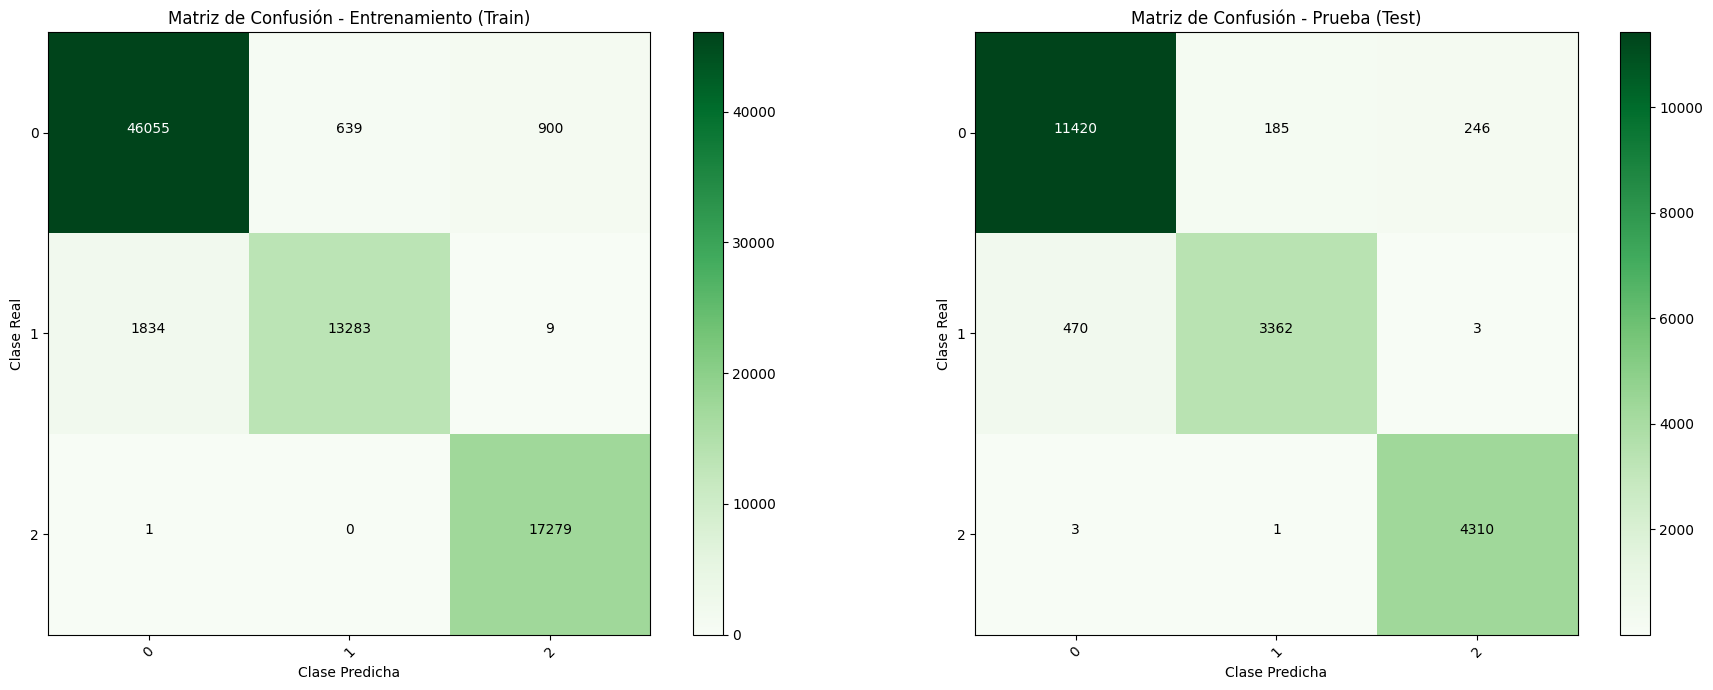

In [15]:
import matplotlib.pyplot as plt
import numpy as np  # Asegúrate de importar numpy
import itertools
from sklearn.metrics import confusion_matrix

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    Funcion que imprime y plotea la matriz de confusión.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Clase Predicha')
    plt.ylabel('Clase Real')

# Obtenemos las matrices de confusión
cfm_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
cfm_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Pintamos las matrices de confusión
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plot_confusion_matrix(cfm_train, classes=[i for i in range(3)], title='Matriz de Confusión - Entrenamiento (Train)')
plt.subplot(1, 2, 2)
plot_confusion_matrix(cfm_test, classes=[i for i in range(3)], title='Matriz de Confusión - Prueba (Test)')

plt.subplots_adjust(wspace=0.1)
plt.show()


Hago las matrices en porcentajes.

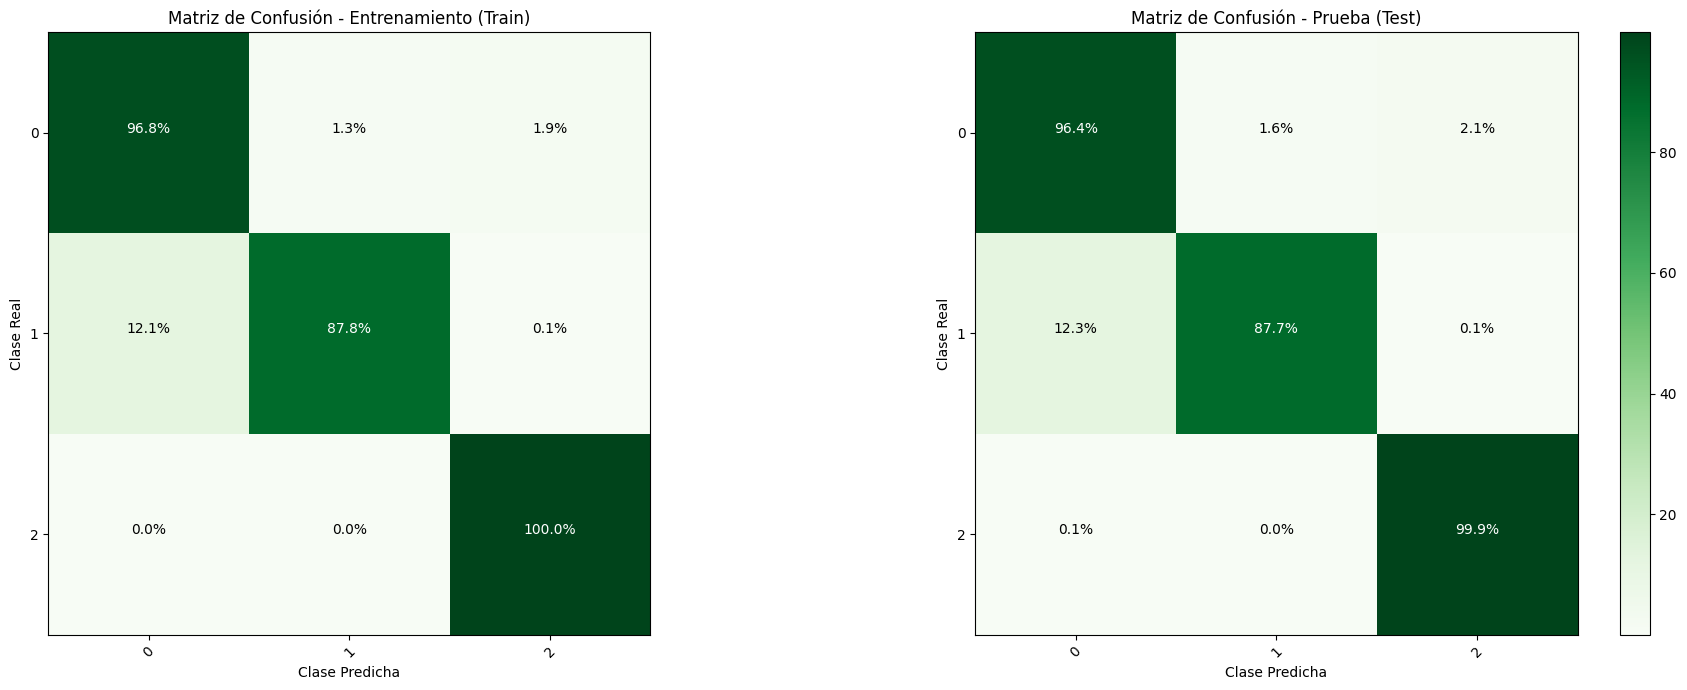

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_percent(cm, classes, title, cmap=plt.cm.Greens):
    """
    Función que imprime y plotea la matriz de confusión en porcentajes.
    """
    # Calculamos los porcentajes de la matriz de confusión
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.imshow(cm_percent, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm_percent.max() / 2.
    for i, j in itertools.product(range(cm_percent.shape[0]), range(cm_percent.shape[1])):
        plt.text(j, i, '{:.1f}%'.format(cm_percent[i, j]), horizontalalignment="center",
                 color="white" if cm_percent[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Clase Predicha')
    plt.ylabel('Clase Real')

# Pintamos las matrices de confusión en porcentajes
plt.figure(figsize=(18, 7))
plt.subplot(1, 2, 1)
plot_confusion_matrix_percent(cfm_train, classes=[i for i in range(3)], title='Matriz de Confusión - Entrenamiento (Train)')
plt.subplot(1, 2, 2)
plot_confusion_matrix_percent(cfm_test, classes=[i for i in range(3)], title='Matriz de Confusión - Prueba (Test)')

plt.subplots_adjust(wspace=0.1)
plt.show()


## Conclusiones.

Después de entrenar y evaluar nuestro modelo de red neuronal, hemos obtenido resultados muy prometedores. 

- Con un accuracy del 95.77% en los datos de entrenamiento y del 95.46% en los datos de prueba, el modelo ha demostrado ser altamente preciso en la clasificación de las clases. Esto indica que nuestras predicciones son correctas en alrededor del 95% de los casos, un porcentaje que, en la mayoría de los contextos, sería considerado como un rendimiento excepcional.

- Además, observamos una precisión del 95.52% en los datos de entrenamiento y del 95.10% en los de prueba. Esto significa que, cuando nuestro modelo predice que una muestra pertenece a una clase, es muy probable que sea correcto.

- Por otro lado, los valores de recall, 94,85% para los datos de entrenamiento y 94,64% para los datos de prueba, nos indican que nuestro modelo es capaz de identificar correctamente una gran parte de las muestras positivas de cada clase.

- Finalmente, el puntaje F1, que es una medida que combina precisión y recall, es 95,11% para los datos de entrenamiento y 94.80% para los datos de prueba, confirmando una vez más el buen rendimiento de nuestro modelo.  

En conclusión, estos resultados indican que nuestro modelo de red neuronal está funcionando excepcionalmente bien para esta tarea de clasificación multiclase. El rendimiento en el conjunto de datos de prueba es comparable al del conjunto de datos de entrenamiento, lo que sugiere que el modelo no está sobreajustando los datos de entrenamiento y debería ser capaz de generalizar bien a nuevos datos. Sin embargo, debemos seguir validando el modelo con nuevos datos y diversas configuraciones para asegurarnos de su robustez y fiabilidad.